In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


Identificando el tipo de datos de cada encabezado

In [ ]:
print(tienda.dtypes)

Producto                   object
Categoría del Producto     object
Precio                    float64
Costo de envío            float64
Fecha de Compra            object
Vendedor                   object
Lugar de Compra            object
Calificación                int64
Método de pago             object
Cantidad de cuotas          int64
lat                       float64
lon                       float64
dtype: object


object → si es texto string

int64 → si es número entero

float64 → si es número decimal

En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

**Ventas totales por tienda**

In [72]:
def formato_latino(numero):
    return f'{numero:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

In [75]:
total_ventas_tienda = tienda['Precio'].sum()
total_ventas_tienda2 = tienda2['Precio'].sum()
total_ventas_tienda3 = tienda3['Precio'].sum()
total_ventas_tienda4 = tienda4['Precio'].sum()

print(f'El Total de ventas de la primera tienda es : {formato_latino(total_ventas_tienda)}')
print(f'El Total de ventas de la segunda tienda es : {formato_latino(total_ventas_tienda2)}')
print(f'El Total de ventas de la tercera tienda es : {formato_latino(total_ventas_tienda3)}')
print(f'El Total de ventas de la cuarta  tienda es : {formato_latino(total_ventas_tienda4)}')

El Total de ventas de la primera tienda es : 1.150.880.400,00
El Total de ventas de la segunda tienda es : 1.116.343.500,00
El Total de ventas de la tercera tienda es : 1.098.019.600,00
El Total de ventas de la cuarta  tienda es : 1.038.375.700,00


En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [77]:
ventas_por_categoria = tienda.groupby(['Categoría del Producto']).size().reset_index(name='Cantidad Vendida')
ventas_por_categoria_t2 = tienda2.groupby(['Categoría del Producto']).size().reset_index(name='Cantidad Vendida')
ventas_por_categoria_t3 = tienda3.groupby(['Categoría del Producto']).size().reset_index(name='Cantidad Vendida')
ventas_por_categoria_t4 = tienda4.groupby(['Categoría del Producto']).size().reset_index(name='Cantidad Vendida')


In [78]:
ventas_ordenadas = ventas_por_categoria.sort_values('Cantidad Vendida', ascending=False)
ventas_ordenadas_t2 = ventas_por_categoria_t2.sort_values('Cantidad Vendida', ascending=False)
ventas_ordenadas_t3 = ventas_por_categoria_t3.sort_values('Cantidad Vendida', ascending=False)
ventas_ordenadas_t4 = ventas_por_categoria_t4.sort_values('Cantidad Vendida', ascending=False)

In [79]:
print('\033[1mLa Venta de productos por categoría de la Tienda 1 son :\033[0m\n\n', ventas_ordenadas.to_string(index=False))
print('\n\033[1mLa Venta de productos por categoría de la Tienda 2 son :\033[0m\n\n',ventas_ordenadas_t2.to_string(index=False))
print('\n\033[1mLa Venta de productos por categoría de la Tienda 3 son :\033[0m\n\n',ventas_ordenadas_t3.to_string(index=False))
print('\n\033[1mLa Venta de productos por categoría de la Tienda 4 son :\033[0m\n\n',ventas_ordenadas_t4.to_string(index=False))

La Venta de productos por categoría de la Tienda 1 son :

  Categoría del Producto  Cantidad Vendida
                Muebles               465
           Electrónicos               448
               Juguetes               324
      Electrodomésticos               312
   Deportes y diversión               284
 Instrumentos musicales               182
                 Libros               173
Artículos para el hogar               171

La Venta de productos por categoría de la Tienda 2 son :

  Categoría del Producto  Cantidad Vendida
                Muebles               442
           Electrónicos               422
               Juguetes               313
      Electrodomésticos               305
   Deportes y diversión               275
 Instrumentos musicales               224
                 Libros               197
Artículos para el hogar               181

La Venta de productos por categoría de la Tienda 3 son :

  Categoría del Producto  Cantidad Vendida
                Muebles

In [80]:
top_3_t = ventas_ordenadas.nlargest(3, 'Cantidad Vendida')
top_3_t2 = ventas_ordenadas_t2.nlargest(3, 'Cantidad Vendida')
top_3_t3 = ventas_ordenadas_t3.nlargest(3, 'Cantidad Vendida')
top_3_t4 = ventas_ordenadas_t4.nlargest(3, 'Cantidad Vendida')
print('\033[1mLos 3 productos mas vendidos de la Tienda 1 son :\033[0m\n\n', top_3_t.to_string(index=False))
print('\033[1m\nLos 3 productos mas vendidos de la Tienda 2 son :\033[0m\n\n', top_3_t2.to_string(index=False))
print('\033[1m\nLos 3 productos mas vendidos de la Tienda 3 son :\033[0m\n\n', top_3_t3.to_string(index=False))
print('\033[1m\nLos 3 productos mas vendidos de la Tienda 4 son :\033[0m\n\n', top_3_t4.to_string(index=False))

Los 3 productos mas vendidos de la Tienda 1 son :

 Categoría del Producto  Cantidad Vendida
               Muebles               465
          Electrónicos               448
              Juguetes               324

Los 3 productos mas vendidos de la Tienda 2 son :

 Categoría del Producto  Cantidad Vendida
               Muebles               442
          Electrónicos               422
              Juguetes               313

Los 3 productos mas vendidos de la Tienda 3 son :

 Categoría del Producto  Cantidad Vendida
               Muebles               499
          Electrónicos               451
              Juguetes               315

Los 3 productos mas vendidos de la Tienda 4 son :

 Categoría del Producto  Cantidad Vendida
               Muebles               480
          Electrónicos               451
              Juguetes               338


En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [91]:
promedio_producto_tienda1 = tienda.groupby('Producto')['Calificación'].mean().reset_index()
promedio_producto_tienda2 = tienda2.groupby('Producto')['Calificación'].mean().reset_index()
promedio_producto_tienda3 = tienda3.groupby('Producto')['Calificación'].mean().reset_index()
promedio_producto_tienda4 = tienda4.groupby('Producto')['Calificación'].mean().reset_index()

In [ ]:
##promedio_producto_tienda2['Calificación'] = promedio_producto_tienda2['Calificación'].apply(formato_latino)
##print(f'\033[1mPromedio por Producto - Tienda 2:\033[0m\n', promedio_producto_tienda2.to_string(index=False))


In [93]:
print('\033[1mPromedio por Producto - Tienda 1:\033[0m\n', promedio_producto_tienda1.to_string(index=False))
print('\n\033[1mPromedio por Producto - Tienda 2:\033[0m\n', promedio_producto_tienda2.to_string(index=False))
print('\n\033[1mPromedio por Producto - Tienda 3:\033[0m\n', promedio_producto_tienda3.to_string(index=False))
print('\n\033[1mPromedio por Producto - Tienda 4:\033[0m\n', promedio_producto_tienda4.to_string(index=False))

Promedio por Producto - Tienda 1:
                    Producto  Calificación
          Ajedrez de madera      4.428571
                    Armario      3.950000
          Asistente virtual      4.075000
                Auriculares      3.640000
  Auriculares con micrófono      3.969697
        Balón de baloncesto      3.872727
          Balón de voleibol      4.071429
                    Batería      4.188679
                  Bicicleta      3.944444
    Bloques de construcción      4.089286
                   Cama box      4.113636
                  Cama king      3.772727
  Carrito de control remoto      4.134615
               Celular ABXY      3.818182
Ciencia de datos con Python      4.102564
                 Cubertería      4.230769
            Cubo mágico 8x8      4.068182
         Cuerda para saltar      3.625000
    Dashboards con Power BI      3.952381
             Dinosaurio Rex      3.775000
                     Estufa      4.133333
          Guitarra acústica      3.956522

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [29]:
ventas_por_producto = tienda.groupby(['Producto']).size().reset_index(name='Cantidad Vendida')
ventas_por_producto_t2 = tienda2.groupby(['Producto']).size().reset_index(name='Cantidad Vendida')
ventas_por_producto_t3 = tienda3.groupby(['Producto']).size().reset_index(name='Cantidad Vendida')
ventas_por_producto_t4 = tienda4.groupby(['Producto']).size().reset_index(name='Cantidad Vendida')

In [35]:
ventas_ordenadas = ventas_por_producto.sort_values('Cantidad Vendida', ascending=False)
ventas_ordenadas_t2 = ventas_por_producto_t2.sort_values('Cantidad Vendida', ascending=False)
ventas_ordenadas_t3 = ventas_por_producto_t3.sort_values('Cantidad Vendida', ascending=False)
ventas_ordenadas_t4 = ventas_por_producto_t4.sort_values('Cantidad Vendida', ascending=False)

In [38]:
top_5_t = ventas_ordenadas.nlargest(5, 'Cantidad Vendida')
top_5_t2 = ventas_ordenadas_t2.nlargest(5, 'Cantidad Vendida')
top_5_t3 = ventas_ordenadas_t3.nlargest(5, 'Cantidad Vendida')
top_5_t4 = ventas_ordenadas_t4.nlargest(5, 'Cantidad Vendida')

print('\033[1mLos 5 productos más vendidos de la Tienda 1 son :\033[0m\n\n', top_5_t.to_string(index=False))
print('\033[1m\nLos 5 productos más vendidos de la Tienda 2 son :\033[0m\n\n', top_5_t2.to_string(index=False))
print('\033[1m\nLos 5 productos más vendidos de la Tienda 3 son :\033[0m\n\n', top_5_t3.to_string(index=False))
print('\033[1m\nLos 5 productos más vendidos de la Tienda 4 son :\033[0m\n\n', top_5_t4.to_string(index=False))

Los 5 productos más vendidos de la Tienda 1 son :

         Producto  Cantidad Vendida
         Armario                60
   TV LED UHD 4K                60
      Microondas                60
Secadora de ropa                58
   Mesa de noche                56

Los 5 productos más vendidos de la Tienda 2 son :

                  Producto  Cantidad Vendida
Iniciando en programación                65
               Microondas                62
                  Batería                61
                Pandereta                58
        Guitarra acústica                58

Los 5 productos más vendidos de la Tienda 3 son :

        Producto  Cantidad Vendida
  Kit de bancas                57
Mesa de comedor                56
      Cama king                56
   Set de ollas                55
  Mesa de noche                55

Los 5 productos más vendidos de la Tienda 4 son :

                  Producto  Cantidad Vendida
                 Cama box                62
               Cuberter

In [32]:
least_5_t1 = ventas_ordenadas.nsmallest(5, 'Cantidad Vendida')
least_5_t2 = ventas_ordenadas_t2.nsmallest(5, 'Cantidad Vendida')
least_5_t3 = ventas_ordenadas_t3.nsmallest(5, 'Cantidad Vendida')
least_5_t4 = ventas_ordenadas_t4.nsmallest(5, 'Cantidad Vendida')

print('\033[1m\nTop 5 productos menos vendidos de la Tienda 1:\033[0m\n\n', least_5_t1.to_string(index=False))
print('\033[1m\nTop 5 productos menos vendidos de la Tienda 2:\033[0m\n\n', least_5_t2.to_string(index=False))
print('\033[1m\nTop 5 productos menos vendidos de la Tienda 3:\033[0m\n\n', least_5_t3.to_string(index=False))
print('\033[1m\nTop 5 productos menos vendidos de la Tienda 4:\033[0m\n\n', least_5_t4.to_string(index=False))


Top 5 productos menos vendidos de la Tienda 1:

                    Producto  Cantidad Vendida
               Celular ABXY                33
  Auriculares con micrófono                33
            Olla de presión                35
                  Pandereta                36
Ciencia de datos con Python                39

Top 5 productos menos vendidos de la Tienda 2:

        Producto  Cantidad Vendida
  Juego de mesa                32
      Impresora                34
Mesa de comedor                34
         Sillón                35
    Auriculares                37

Top 5 productos menos vendidos de la Tienda 3:

                Producto  Cantidad Vendida
Bloques de construcción                35
                Mochila                36
             Microondas                36
           Set de vasos                36
           Vaso térmico                38

Top 5 productos menos vendidos de la Tienda 4:

                    Producto  Cantidad Vendida
         Guitarra eléc

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [ ]:
tienda.head()

In [ ]:
promedio_envio_tienda1 = tienda['Costo de envío'].mean()
promedio_envio_tienda2 = tienda2['Costo de envío'].mean()
promedio_envio_tienda3 = tienda3['Costo de envío'].mean()
promedio_envio_tienda4 = tienda4['Costo de envío'].mean()

In [71]:
# Lista de nombres de tiendas y sus promedios
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
promedios_envio = [promedio_envio_tienda1, promedio_envio_tienda2, promedio_envio_tienda3, promedio_envio_tienda4]

# Imprimir con formato europeo (punto para miles, coma decimal)
for nombre, promedio in zip(nombres_tiendas, promedios_envio):
    print(f'El promedio del costo de envío de la {nombre} es: {promedio:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))

El promedio del costo de envío de la Tienda 1 es: 26.018,61
El promedio del costo de envío de la Tienda 2 es: 25.216,24
El promedio del costo de envío de la Tienda 3 es: 24.805,68
El promedio del costo de envío de la Tienda 4 es: 23.459,46


In [62]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

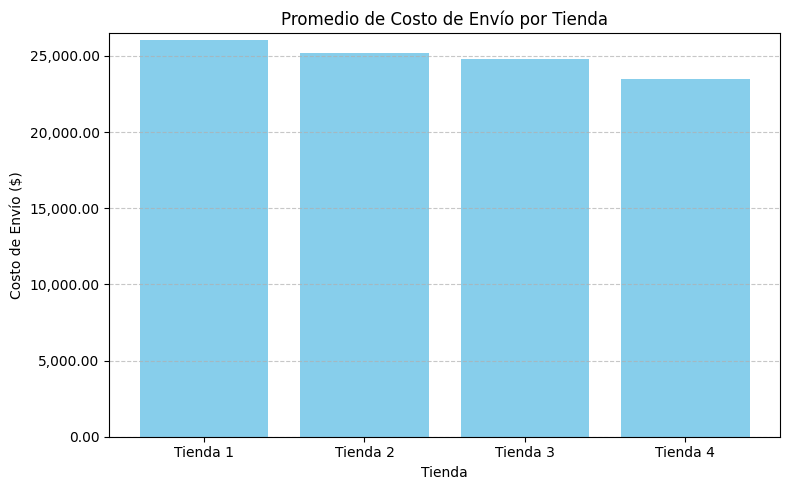

In [69]:
# Datos
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
promedios_ = [promedio_envio_tienda1, promedio_envio_tienda2, promedio_envio_tienda3, promedio_envio_tienda4]

# Función para formato con separador de miles (punto) y 2 decimales
def formatear_miles(x, _):
    return f'{x:,.2f}'

# Crear gráfico
plt.figure(figsize=(8, 5))
plt.bar(tiendas, promedios_, color='skyblue')
plt.title('Promedio de Costo de Envío por Tienda')
plt.ylabel('Costo de Envío ($)')
plt.xlabel('Tienda')
plt.ylim(0, max(promedios_) + 500)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Aplicar el formateo
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatear_miles))

plt.tight_layout()
plt.show()
